<font size="12">Computational Physics: Week 2 (Homework)</font>



## Exercise 1: Principal Axes of Bivariate Distributions <a class="anchor" id="five"></a>
**1.1**

Using the fact the correlation vanishes in the principal axes coordinate system (by definition), we can calculate the corelation between $P_1$ and $P_2$:

$$0=<P_1P_2>=\int\Big((x-\mu_x)\cos\alpha+(y-\mu_y)\sin\alpha\Big)\Big(-(x-\mu_x)\sin\alpha(y-\mu_y)\cos\alpha\Big)h(x,y)dxdx=$$

$$=\cos\alpha\sin\alpha\Big(\int(y-\mu_y)^2h(x,y)dxdy-\int(x-\mu_x)^2h(x,y)dxdy\Big)+\big(\cos^2\alpha-\sin^2\alpha\big)\int(x-\mu_x)(y-\mu_y)h(x,y)dxdy=$$

We know that:

$$\sigma^2_x = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x)^2 h(x,y) dx dy$$

$$\sigma^2_y = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(y-\mu_y)^2 h(x,y) dx dy$$

$$\sigma_{xy} = \int_{-\infty}^{\infty}\int_{-\infty}^{\infty}(x-\mu_x) (y-\mu_y) h(x,y) dx dy$$

So we can get:


$$=\cos\alpha\sin\alpha(\sigma_y^2-\sigma_x^2)+\sigma_{xy}(\cos^2\alpha-\sin^2\alpha)=0$$

$$\frac{1}{2}\sin2\alpha(\sigma_y^2-\sigma_x^2)=-\sigma_{xy}\cos2\alpha$$
$$\tan2\alpha=\frac{2\sigma_{xy}}{\sigma_x^2-\sigma_y^2}$$

**1.2**

It is clear from the same calculation as above the correlation vanishes.


**1.3**

When working with real data sets that often have outliers the fit can result in grossly incorrect values of $\alpha$ because of the impact of outliers on the variance and the correlation coefficients.

Figure 3.23 in the book shows the best-fit of a bivariate Gaussian. $\alpha$ is determined using the nonrobust method, which is grossly incorrect, while the robust best fit still recognizes the orientation of the distribution’s core. The robust is much closer to the input value.

**1.4**

In [ ]:
!pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


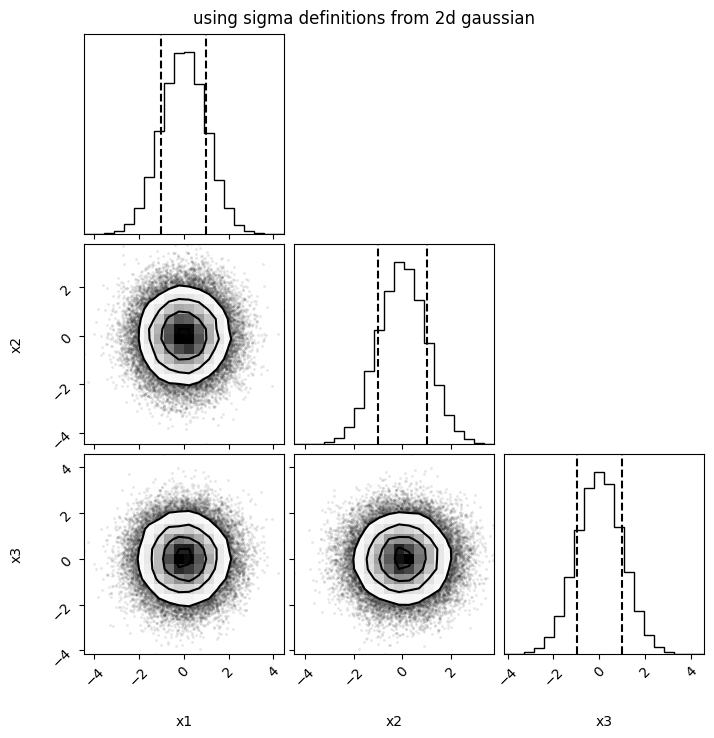

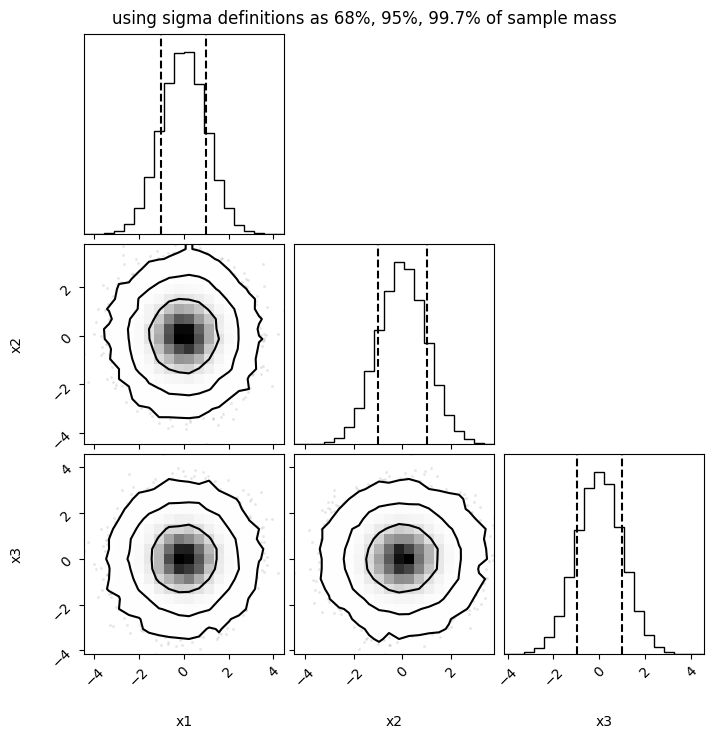

In [ ]:
import corner
import numpy as np

# Generate some fake data from a Gaussian
np.random.seed(42)
x = np.random.randn(50000, 3)
# formally correct sigma definition
fig = corner.corner(x, quantiles=(0.16, 0.84), labels=['x1','x2','x3'])
fig.suptitle("using sigma definitions from 2d gaussian");

# standard sample mass definition
fig = corner.corner(x, quantiles=(0.16, 0.84), levels=(0.68,0.95,0.997), labels=['x1','x2','x3'])
fig.suptitle("using sigma definitions as 68%, 95%, 99.7% of sample mass");



## Exercise 2: Correlation coefficients <a class="anchor" id="five"></a>

**2.1**



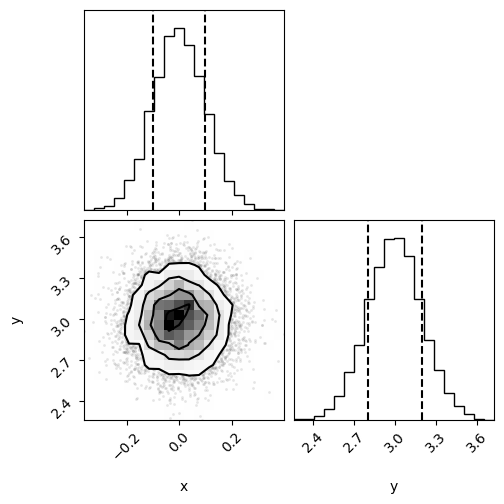

In [ ]:
import scipy

mu_x, sigma_x, mu_y, sigma_y = 0, 0.1, 3, 0.2 # mean and standard deviation
N=10000
x, y = np.random.normal(mu_x, sigma_x, N), np.random.normal(mu_y, sigma_y, N)
r = scipy.stats.pearsonr(x,y)[0]
data = np.zeros([N,2])
for i in range(N):
  data[i] = x[i],y[i]
fig = corner.corner(data, quantiles=(0.16, 0.84), labels=['x','y'])


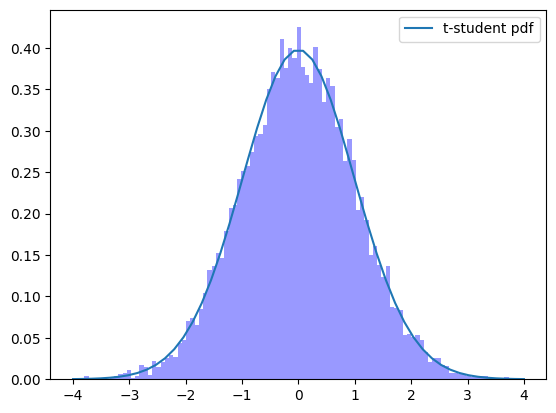

In [ ]:
import matplotlib.pyplot as plt

N=100
k = N-2
x = np.linspace(-4,4)
dist = scipy.stats.t(k)
plt.plot(x,dist.pdf(x), label='t-student pdf')

t =[]

for i in range(10000):
  x, y = np.random.normal(mu_x, sigma_x, N), np.random.normal(mu_y, sigma_y, N)
  r = scipy.stats.pearsonr(x,y)[0]
  t.append(r*np.sqrt((N-2)/(1-r**2)))

plt.hist(t, bins=100, alpha=0.4, color='b', density=True)
plt.legend()
plt.show()

In [ ]:
N=10
r=[]
for i in range(10000):
  x, y = np.random.normal(mu_x, sigma_x, N), np.random.normal(mu_y, sigma_y, N)
  r.append(scipy.stats.pearsonr(x,y)[0])

p=0
for ri in r:
  if ri>=0.72:
    p+=1

print(f'The probability of having r>=0.72 is {np.round(p/len(r),2)} %.')

The probability of having r>=0.72 is 0.01 %.


**2.3**

Both Pearson and Spearman are used for measuring the correlation but the difference between them lies in the kind of analysis we want.

The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Both Spearman’s and Kendall’s correlation coefficients are based on the concept
of ranks. The main advantage of ranks is that their distribution is known.

Instead of converting the data to ranks and then computing the Pearson correlation, Kendall’s rank correlation coefficient (or Kendall’s tau), considering the similarity of orderings for any pair of indices.
Spearman’s rho is more sensitive to error and discrepancies in the data.
When data is normal, Kendall’s tau has smaller gross error sensitivity and smaller asymptotic variance.

**2.4**




In [ ]:
!pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 KB 9.3 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


@pickle_results: computing results and saving to 'fig_correlations_dump.pkl'


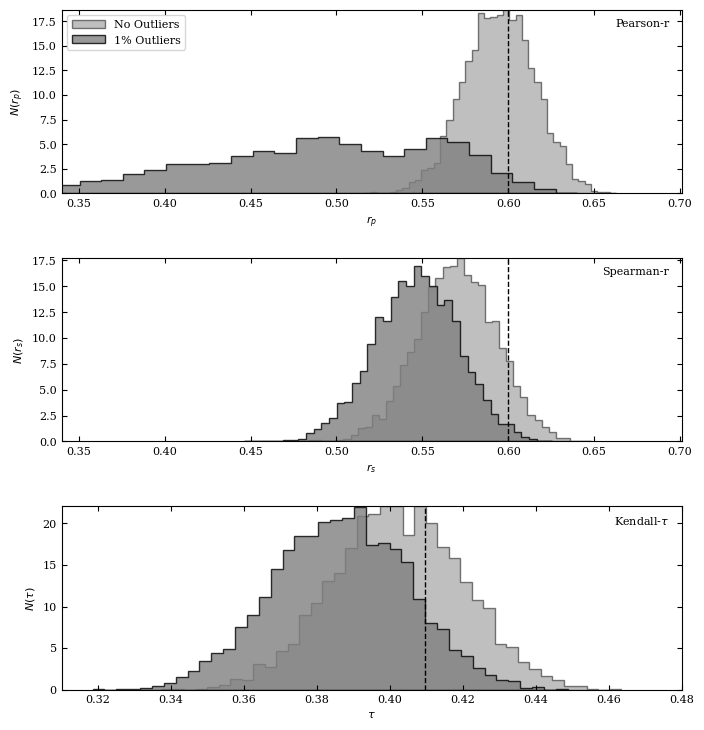

In [ ]:
"""
Correlation estimates
---------------------
Figure 3.24.
Bootstrap estimates of the distribution of Pearson's, Spearman's, and Kendall's
correlation coefficients based on 2000 resamplings of the 1000 points shown
in figure 3.23. The true values are shown by the dashed lines. It is clear
that Pearson's correlation coefficient is not robust to contamination.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

from astroML.stats.random import bivariate_normal
from astroML.utils.decorators import pickle_results

# percent sign must be escaped if usetex=True
import matplotlib
if matplotlib.rcParams.get('text.usetex'):
    pct = '\%'
else:
    pct = '%'

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Set parameters for the distributions
Nbootstraps = 5000
N = 1000

sigma1 = 2.0
sigma2 = 1.0
mu = (10.0, 10.0)
alpha_deg = 45.0
alpha = alpha_deg * np.pi / 180
f = 0.01

#------------------------------------------------------------
# sample the distribution
# without outliers and with outliers
np.random.seed(0)
X = bivariate_normal(mu, sigma1, sigma2, alpha, N)

X_out = X.copy()
X_out[:int(f * N)] = bivariate_normal(mu, 2, 5,
                                      45 * np.pi / 180., int(f * N))

# true values of rho (pearson/spearman r) and tau
# tau value comes from Eq. 41 of arXiv:1011.2009
rho_true = 0.6
tau_true = 2 / np.pi * np.arcsin(rho_true)


#------------------------------------------------------------
# Create a function to compute the statistics.  Since this
#  takes a while, we'll use the "pickle_results" decorator
#  to save the results of the computation to disk
@pickle_results('fig_correlations_dump.pkl')
def compute_results(N, Nbootstraps):
    results = np.zeros((3, 2, Nbootstraps))

    for k in range(Nbootstraps):
        ind = np.random.randint(N, size=N)
        for j, data in enumerate([X, X_out]):
            x = data[ind, 0]
            y = data[ind, 1]
            for i, statistic in enumerate([stats.pearsonr,
                                           stats.spearmanr,
                                           stats.kendalltau]):
                results[i, j, k] = statistic(x, y)[0]

    return results

results = compute_results(N, Nbootstraps)

#------------------------------------------------------------
# Plot the results in a three-panel plot
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(bottom=0.1, top=0.95, hspace=0.35)

histargs = (dict(alpha=0.5, label='No Outliers'),
            dict(alpha=0.8, label='%i%s Outliers' % (int(f * 100), pct)))

distributions = ['Pearson-r', 'Spearman-r', r'Kendall-$\tau$']
xlabels = ['r_p', 'r_s', r'\tau']\

for i in range(3):
    ax = fig.add_subplot(311 + i)
    for j in range(2):
        ax.hist(results[i, j], 40, histtype='stepfilled', fc='gray',
                density=True, **histargs[j])

    if i == 0:
        ax.legend(loc=2)

    ylim = ax.get_ylim()
    if i < 2:
        ax.plot([rho_true, rho_true], ylim, '--k', lw=1)
        ax.set_xlim(0.34, 0.701)
    else:
        ax.plot([tau_true, tau_true], ylim, '--k', lw=1)
        ax.set_xlim(0.31, 0.48)
    ax.set_ylim(ylim)

    ax.text(0.98, 0.95, distributions[i], ha='right', va='top',
            transform=ax.transAxes)

    ax.set_xlabel('$%s$' % xlabels[i])
    ax.set_ylabel('$N(%s)$' % xlabels[i])

plt.show()

earson’s correlation coefficient has two main deficiencies. First, the measurement errors for {$x_i$} and {$y_i$} are not used. Second, Pearson’s correlation coefficient is sensitive to Gaussian outliers. It is clear that Pearson’s correlation coefficient is not robust to contamination.

he efficiency of Kendall’s $\tau$ relative to Pearson’s correlation coefficient for a bivariate Gaussian distribution is greater than 90%, and can exceed it by large factors for non-Gaussian distributions. Therefore, Kendall’s $\tau$ is a good general choice for measuring the correlation of any two data sets.



## Exercise 3: Cloning quasars <a class="anchor" id="five"></a>

**3.1**

In [ ]:
from astroML.datasets import fetch_dr7_quasar

# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
data = data[:10000]

z = data['redshift']

downloading DR7 quasar dataset from http://das.sdss.org/va/qsocat/dr7qso.dat.gz to /root/astroML_data



**3.2**

My best fried is Ashish and I will not replace him for any scipy package.

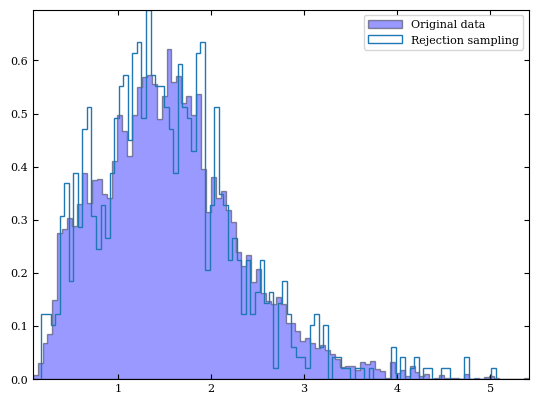

In [ ]:
_ = plt.hist(z, bins=100, alpha=0.4, color='b', density=True, histtype='stepfilled', label='Original data')

counts, bins = np.histogram(z, bins=100, density=True)
dist = scipy.stats.rv_histogram((counts,bins))
plt.hist(dist.rvs(size=N),bins=100,density=True,histtype='step',label='Rejection sampling')

plt.legend()

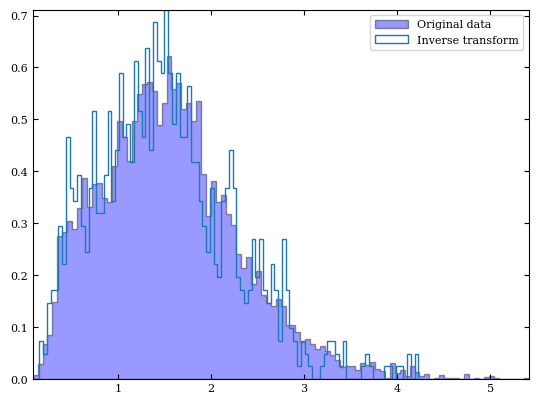

In [ ]:
_ = plt.hist(z, bins=100, alpha=0.4, color='b', density=True, histtype='stepfilled', label='Original data')

counts, bins = np.histogram(z, bins=50, density=True)
mids = (bins[1:] + bins[:-1]) / 2
cdf = np.cumsum(counts) / np.sum(counts)

z_new = scipy.interpolate.interp1d(cdf, mids)(np.random.uniform(0.002, 0.999, 1000))

plt.hist(z_new, bins=100, density=True, histtype='step',label='Inverse transform')
plt.legend()

## Exercise 4:  Position of a quasar<a class="anchor" id="five"></a>

### Part 1


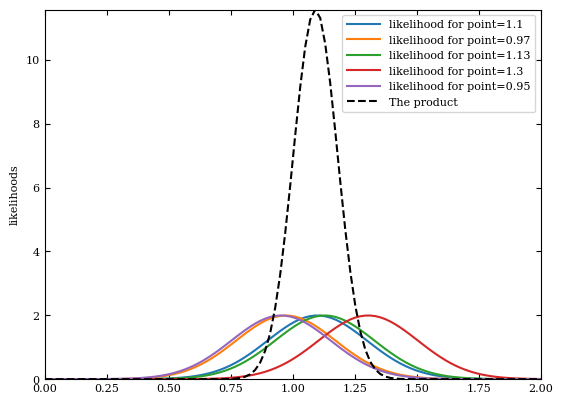

In [ ]:
np.random.seed(42)
N=5
mu=1
sigma = 0.2
fake_data = np.random.normal(mu, sigma, N)
#_ = plt.hist(fake_data, bins=100, alpha=0.4, color='b', density=True, histtype='stepfilled', label='fake data')

x = np.linspace(0,2,100)
prod = np.ones(len(x))
for point in fake_data:
  dist = scipy.stats.norm.pdf(x, loc=point, scale=sigma)
  plt.plot(x, dist, label=f'likelihood for point={round(point,2)}')
  prod *= dist


plt.plot(x, prod, label='The product', color='black',ls='--')
plt.ylabel('likelihoods')
#plt.ylim([0,3])
plt.legend()
plt.show()

In [ ]:
max = np.argsort(prod)
print(f'The maxsimun likelihood estimator I got is: {round(x[max[-1]],3)}')
print(f'The mean estimator is {round(np.mean(fake_data),3)}')

The maxsimun likelihood estimator I got is: 1.091
The mean estimator is 1.092


### Part 2

In [ ]:
diff2 = np.diff(np.log(prod),n=2)
norm_diff2 = diff2/(x[0]-x[1])**2
fisher = 1/np.sqrt(-norm_diff2)[0]
print(f'Fisher error on estimated mean is {round(fisher,4)}')

Fisher error on estimated mean is 0.0894


In [ ]:
print(f'Fisher matrix error is {round(sigma/N**0.5,4)}')


Fisher matrix error is 0.0894


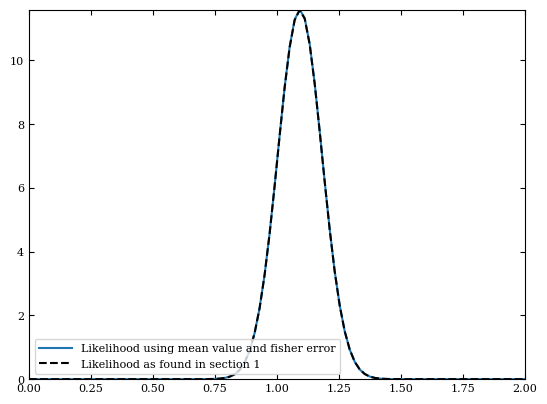

In [ ]:
plt.plot(x, 2.6*scipy.stats.norm.pdf(x, loc=np.mean(fake_data), scale=fisher), label='Likelihood using mean value and fisher error')
plt.plot(x, prod, label='Likelihood as found in section 1', color='black',ls='--')

plt.legend(loc=3)

### Part 3

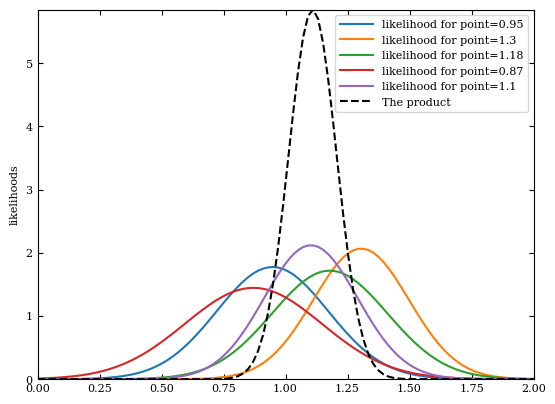

In [ ]:
np.random.seed(42)
N=5
mu=1
sigma = np.random.normal(0.2, 0.05, N)
fake_data = np.array([np.random.normal(mu, s) for s in sigma])


x = np.linspace(0,2,100)
prod = np.ones(len(x))
for point,s in zip(fake_data,sigma):
  dist = scipy.stats.norm.pdf(x, loc=point, scale=s)
  plt.plot(x, dist, label=f'likelihood for point={round(point,2)}')
  prod *= dist


plt.plot(x, prod, label='The product', color='black',ls='--')
plt.ylabel('likelihoods')

plt.legend()
plt.show()

## Exercise 5:  Confidence Estimating: Bootstrap & Jackknife<a class="anchor" id="five"></a>

**5.1**

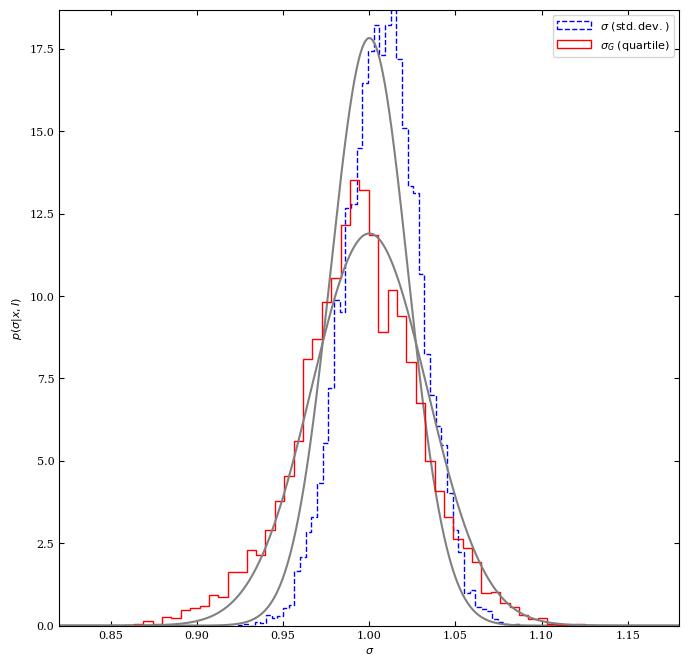

In [ ]:
# Ivezic v2, Figure 4.3, modified slightly by GTR and SRT
# %load ../code/fig_bootstrap_gaussian.py
# Author: Jake VanderPlas
# License: BSD

from astroML.resample import bootstrap
from astroML.stats import sigmaG
from scipy.stats import norm

m = 1000  # number of points
n = 10000  # number of bootstraps

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(11)
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute bootstrap resamplings of data
mu1_bootstrap = bootstrap(data, n, np.std,
                          kwargs=dict(axis=1, ddof=1))
mu2_bootstrap = bootstrap(data, n, sigmaG,
                          kwargs=dict(axis=1))

#------------------------------------------------------------
# Compute the theoretical expectations for the two distributions
xgrid = np.linspace(0.8, 1.2, 1000)

sigma1 = 1. / np.sqrt(2 * (m - 1))
pdf1 = norm(1, sigma1).pdf(xgrid)

sigma2 = 1.06 / np.sqrt(m)
pdf2 = norm(1, sigma2).pdf(xgrid)

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(8, 8))

ax.hist(mu1_bootstrap, bins=50, density=True,
        histtype='step', color='blue', ls='dashed',
        label=r'$\sigma\ {\rm (std. dev.)}$')
ax.plot(xgrid, pdf1, color='gray')

ax.hist(mu2_bootstrap, bins=50, density=True,
        histtype='step', color='red',
        label=r'$\sigma_G\ {\rm (quartile)}$')
ax.plot(xgrid, pdf2, color='gray')

ax.set_xlim(0.82, 1.18)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')
ax.legend()

plt.show()

**5.2**

1.0015366861435233 0.02228013942047898
0.597747861971019 0.031353107946452324
mu_1 mean: 1.00 +- 0.02
mu_2 mean: 0.60 +- 0.03


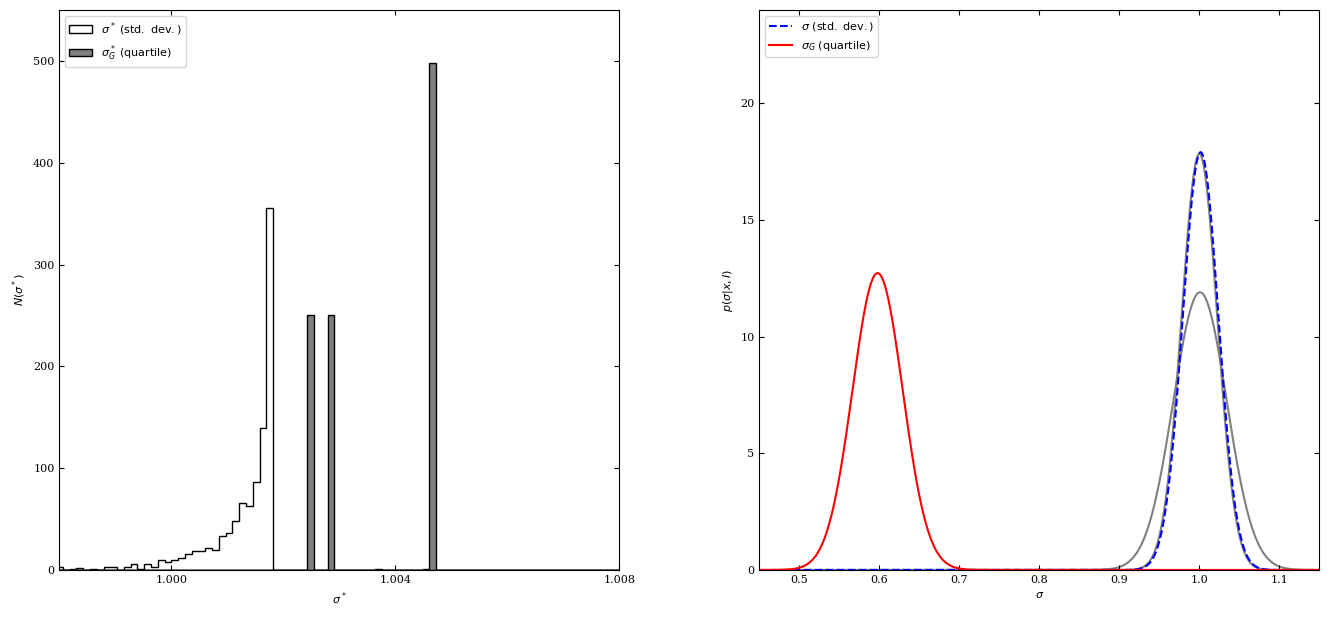

In [ ]:
# Ivezic v2, Figure 4.4, modified slightly by SRT
# %load ./code/fig_jackknife_gaussian.py
# Author: Jake VanderPlas
# License: BSD

from astroML.resample import jackknife
from astroML.stats import sigmaG

m = 1000  # number of points
n = 10000  # number of bootstraps

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
data = norm(0, 1).rvs(m)

# mu1 is the mean of the standard-deviation-based width
mu1, sigma_mu1, mu1_raw = jackknife(data, np.std,
                                    kwargs=dict(axis=1, ddof=1),
                                    return_raw_distribution=True)

pdf1_theory = norm(1, 1. / np.sqrt(2 * (m - 1)))
pdf1_jackknife = norm(mu1, sigma_mu1)
print(mu1, sigma_mu1)

# mu2 is the mean of the interquartile-based width
#  WARNING: do not use the following in practice.  This example
#           shows that jackknife fails for rank-based statistics.
mu2, sigma_mu2, mu2_raw = jackknife(data, sigmaG,
                                    kwargs=dict(axis=1),
                                    return_raw_distribution=True)
pdf2_theory = norm(data.std(), 1.06 / np.sqrt(m))
pdf2_jackknife = norm(mu2, sigma_mu2)
print(mu2, sigma_mu2)

#------------------------------------------------------------
# plot the results
print("mu_1 mean: %.2f +- %.2f" % (mu1, sigma_mu1))
print("mu_2 mean: %.2f +- %.2f" % (mu2, sigma_mu2))

fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

# plot all jacnknife results on histogram
ax = fig.add_subplot(121)
ax.hist(mu1_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma^*\ {\rm (std.\ dev.)}$',
        histtype='stepfilled', fc='white',
        ec='black', density=False)
ax.hist(mu2_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma_G^*\ {\rm (quartile)}$',
        histtype='stepfilled', fc='gray',
        density=False)
ax.legend(loc='upper left', handlelength=2)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.004))
ax.set_xlabel(r'$\sigma^*$')
ax.set_ylabel(r'$N(\sigma^*)$')
ax.set_xlim(0.998, 1.008)
ax.set_ylim(0, 550)

# plot the bias-corrected jackknife estimates
ax = fig.add_subplot(122)
x = np.linspace(0.45, 1.15, 1000)
ax.plot(x, pdf1_jackknife.pdf(x),
        color='blue', ls='dashed',
        label=r'$\sigma\ {\rm (std.\ dev.)}$',
        zorder=2)
ax.plot(x, pdf1_theory.pdf(x),
        color='gray', zorder=1)
ax.plot(x, pdf2_jackknife.pdf(x),
        color='red',
        label=r'$\sigma_G\ {\rm (quartile)}$',
        zorder=2)
ax.plot(x, pdf2_theory.pdf(x),
        color='gray', zorder=1)
plt.legend(loc='upper left', handlelength=2)


ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')
ax.set_xlim(0.45, 1.15)
ax.set_ylim(0, 24)

plt.show()